In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("height-weight.csv")

In [18]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height distribution across different weights')

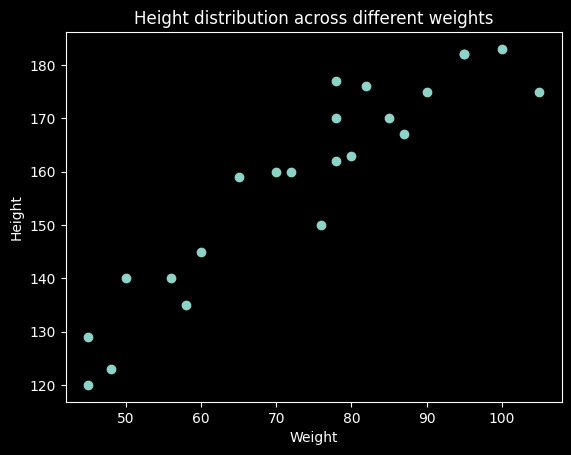

In [21]:
plt.scatter(y=df['Height'],x=df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height distribution across different weights")

In [22]:
df.corr(method='pearson')

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


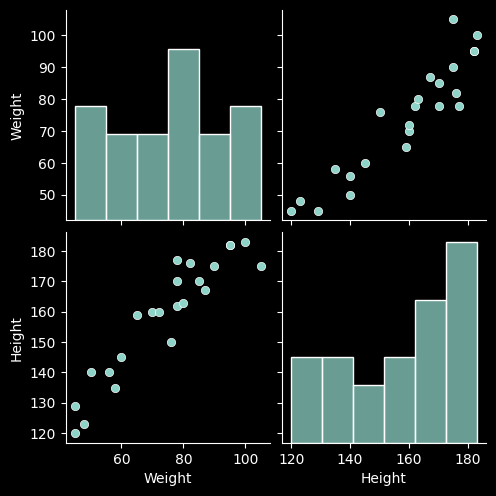

In [24]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
## Creating dependent and independent features
X = np.array(df[['Weight']]) ## independent feature must be an two dimensional array or a data frame
Y = np.array(df['Height'])## dependent feature



In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25,random_state=42)

In [82]:
x_train.shape

(17, 1)

In [83]:
x_test.shape

(6, 1)

In [84]:
y_train.shape

(17,)

In [85]:
y_test.shape

(6,)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [87]:
x_test=scaler.transform(x_test)

In [88]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)

In [89]:
reg.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [90]:
print(f"Coefficient: {reg.coef_}")

Coefficient: [17.2982057]


In [91]:
print(f"Intercept: {reg.intercept_}")

Intercept: 156.47058823529412


Text(0.5, 1.0, 'Training Plot')

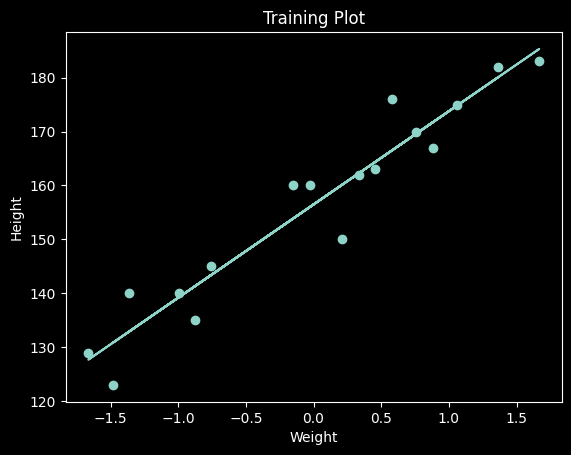

In [92]:
plt.scatter(x_train, y_train)
plt.plot(x_train,reg.predict(x_train))
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Training Plot")

In [93]:
## Predicting for test data
y_pred=reg.predict(x_test)
print(y_test)
y_pred

[177 170 120 182 159 175]


array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [95]:
mae,mse,rmse

(9.66512588679501, 114.84069295228699, np.float64(10.716374991212605))

In [96]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

In [97]:
r2

0.7360826717981276

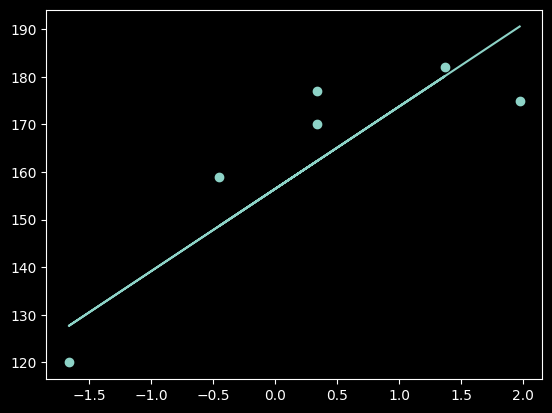

In [98]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [102]:
import statsmodels.api as sm


In [103]:
model=sm.OLS(y_train,x_train).fit()

In [ ]:
y_pred=model.predict(x_test)

In [106]:
y_pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [107]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 31 Jul 2025   Prob (F-statistic):                       0.664
Time:                        12:54:55   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [111]:
reg.predict(scaler.transform([[72]]))

array([155.97744705])